# SIR Modelling

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import optimize
from scipy import integrate


In [2]:
%matplotlib inline
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',500)
sns.set(style="whitegrid")

In [3]:
# We start with a small data set initially
df_analyse=pd.read_csv('../data/processed/COVID_JH_data_small_flat_table.csv',sep=';',parse_dates=[0])
df_analyse=df_analyse.sort_values('date',ascending=True)
df_analyse.head()

,date,Germany,United Kingdom,India,US
0,2020-01-22,0,0,0,1
1,2020-01-23,0,0,0,1
2,2020-01-24,0,0,0,2
3,2020-01-25,0,0,0,2
4,2020-01-26,0,0,0,5


In [4]:
N0=234494
beta=0.4
gamma=0.1
I0=df_analyse.Germany[35]
S0=N0-I0
R0=0

In [5]:
# Function for the SIR model
def SIR_model(SIR,beta,gamma):
    'SIR model for simulatin spread'
    'S: Susceptible population'
    'I: Infected popuation'
    'R: Recovered population'
    'S+I+R=N (remains constant)'
    'dS+dI+dR=0 model has to satisfy this condition at all time'
    S,I,R=SIR
    dS_dt=-beta*S*I/N0
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return ([dS_dt,dI_dt,dR_dt])

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,'infected':I0,'recovered':R0})

for each_t in np.arange(100):
    new_delta_vec=SIR_model(SIR,beta,gamma)
    SIR=SIR+new_delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],'infected':SIR[1],'recovered':SIR[2]},ignore_index=True)
    
    

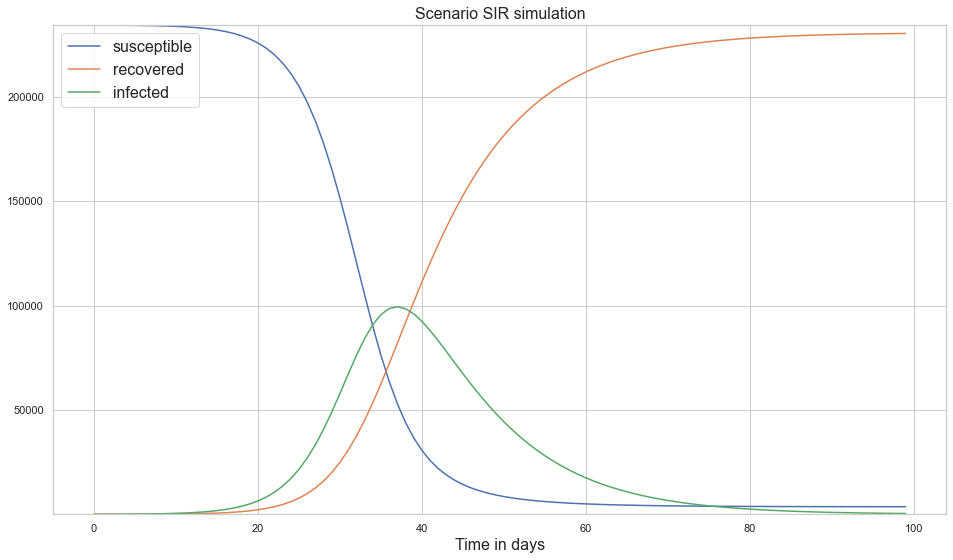

In [7]:
fig,ax1=plt.subplots(1,1)
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected')
ax1.set_ylim(10,N0)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulation',size=16)
ax1.set_xlabel('Time in days',size=16)
ax1.legend(loc='best',prop={'size' :16})

# Fitting parameters for the SIR Model

In [8]:
ydata=np.array(df_analyse.Germany[36:])
t=np.arange(len(ydata))

In [9]:
def SIR_model_t(SIR,t,beta,gamma):
    'SIR model for simulatin spread'
    'S: Susceptible population'
    'I: Infected popuation'
    'R: Recovered population'
    'S+I+R=N (remains constant)'
    'dS+dI+dR=0 model has to satisfy this condition at all time'
    S,I,R=SIR
    dS_dt=-beta*S*I/N0
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return ([dS_dt,dI_dt,dR_dt])

In [10]:
def fit_odeint(x,beta,gamma):
    return integrate.odeint(SIR_model_t,(S0,I0,R0),t,args=(beta,gamma))[:,1]

In [11]:
popt=[beta,gamma]
fit_odeint(t,*popt)

array([2.70000000e+01, 3.64441375e+01, 4.91904402e+01, 6.63925058e+01,
       8.96061039e+01, 1.20928702e+02, 1.63186830e+02, 2.20187241e+02,
       2.97052723e+02, 4.00669601e+02, 5.40281264e+02, 7.28270355e+02,
       9.81180401e+02, 1.32103362e+03, 1.77700060e+03, 2.38746146e+03,
       3.20245134e+03, 4.28638232e+03, 5.72074217e+03, 7.60614172e+03,
       1.00625758e+04, 1.32260807e+04, 1.72392554e+04, 2.22327751e+04,
       2.82958788e+04, 3.54369234e+04, 4.35410612e+04, 5.23395032e+04,
       6.14090353e+04, 7.02151744e+04, 7.81954790e+04, 8.48588474e+04,
       8.98665579e+04, 9.30696579e+04, 9.44985779e+04, 9.43196362e+04,
       9.27797797e+04, 9.01565454e+04, 8.67216057e+04, 8.27189952e+04,
       7.83552197e+04, 7.37973700e+04, 6.91758190e+04, 6.45890482e+04,
       6.01090763e+04, 5.57866537e+04, 5.16558396e+04, 4.77378430e+04,
       4.40441432e+04, 4.05789724e+04, 3.73412596e+04, 3.43261355e+04,
       3.15260860e+04, 2.89318300e+04, 2.65329813e+04, 2.43185434e+04,
      

In [12]:
popt,pcov=optimize.curve_fit(fit_odeint,t,ydata)
perr=np.sqrt(np.diag(pcov))
#the diagonal of the covariance matrix gives the variance of the parameters
#sqrt of the variance gives the standard deviation
print('standard deviation:',str(perr), 'Start infection:',ydata[0])
print('optimal parameters: beta',popt[0],' Gamma:',popt[1])

C:\Users\Sriram\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Sriram\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
C:\Users\Sriram\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sriram\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Sriram\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation: [0.00349862 0.00018396] Start infection: 46
optimal parameters: beta 0.20592391223140444  Gamma: 0.0017634567987311015


In [13]:
fitted=fit_odeint(t,*popt)

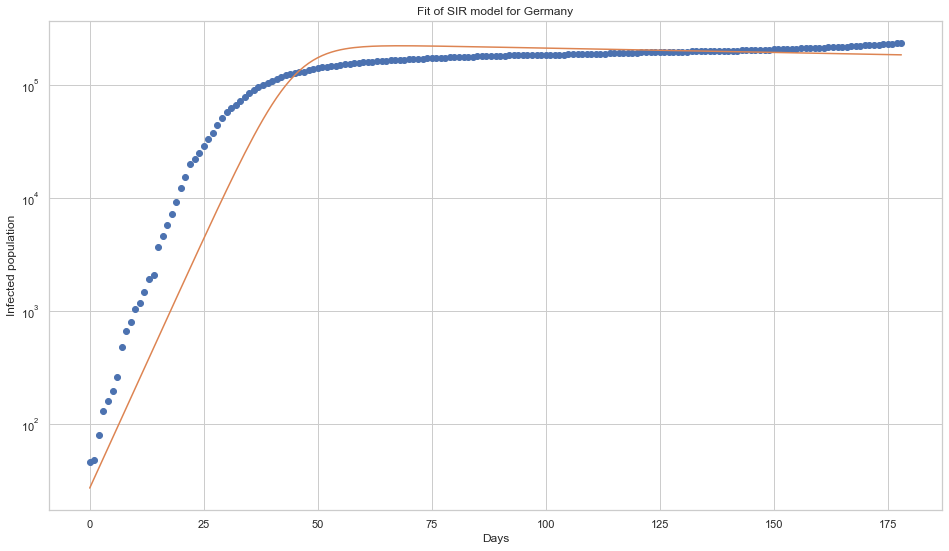

Optimal parameters: beta = 0.20592391223140444 and gamma =  0.0017634567987311015
Basic Reproduction Number R0  116.77287040974146
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [14]:
plt.semilogy(t,ydata,'o')
plt.semilogy(t,fitted)
plt.title('Fit of SIR model for Germany')
plt.ylabel('Infected population')
plt.xlabel('Days')
plt.show()
print('Optimal parameters: beta =',popt[0],'and gamma = ',popt[1])
print('Basic Reproduction Number R0 ',popt[0]/ popt[1])
print('This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki')

# Dynamic beta in SIR simulation

In [26]:
t_initial=21
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array((t_hold)*[beta_min]),
                       np.linspace(beta_min,beta_max,t_relax),
                       ))
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.37769231, 0.35538462, 0.33307692,
       0.31076923, 0.28846154, 0.26615385, 0.24384615, 0.22153846,
       0.19923077, 0.17692308, 0.15461538, 0.13230769, 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.1245    , 0.139     , 0.1535    ,
       0.168     , 0.1825    , 0.197     , 0.2115    , 0.226     ,
       0.2405    , 0.255     , 0.2695    , 0.284     , 0.2985    ,
       0.313     , 0.3275    , 0.342     , 0.3565    , 0.371  

In [29]:
N0

234494

In [27]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,'infected':I0,'recovered':R0})

for each_beta in pd_beta:
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
    SIR=SIR+new_delta_vec 
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],'infected':SIR[1],'recovered':SIR[2]},ignore_index=True)

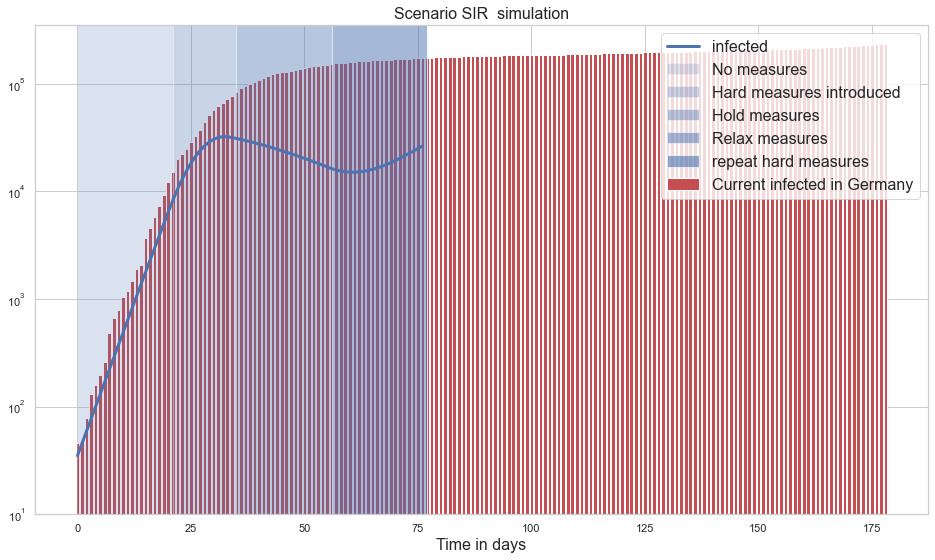

In [28]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)
t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label='Current infected in Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='No measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='Hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='Hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='Relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repeat hard measures')
ax1.set_ylim(10, 1.5*(ydata[len(ydata)-1]))#propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR  simulation',size=16)
ax1.set_xlabel('Time in days',size=16)
ax1.legend(loc='best',prop={'size': 16});
plt.show()

In [16]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input,Output
import plotly.io as pio


df_SIR_large=pd.read_csv('../data/processed/COVID_JH_flat_table_confirmed.csv',sep=';',parse_dates=[0])
df_SIR_large=df_SIR_large.sort_values('date',ascending=True)

fig=go.Figure()
app=dash.Dash()

app.layout=html.Div([
        dcc.Markdown('''
                     # Applied Datascience on COVID-19 Data
                     This Dashboard shows the confirmed infected cases and the simulated
                     SIR curve.
                    '''),
    # For Country dropdown menu
        dcc.Markdown(''' ## Single-Select Country for Visualization'''),
        
        dcc.Dropdown( id='single_select_country',
                     options=[{'label':each,'value':each} for each in df_SIR_large.columns[1:]],
                     value='Germany',
                     multi=False),
    #For changing beta ,gamma, t_initial, t_intro_measures,t_hold,t_relax
    dcc.Markdown(''' ## Change the values below(and press enter) to manipulate the SIR curve:'''),
    html.Label(["No measures introduced(days):",
              dcc.Input(id='t_initial',
             type='number',
             value=28,debounce=True)],style={"margin-left": "30px"}),
    html.Label(["Measures introduced over(days):",
              dcc.Input(id='t_intro_measures',
             type='number',
             value=14,debounce=True)],style={"margin-left": "30px"}),
    html.Label(["Introduced measures hold time(days):",
              dcc.Input(id='t_hold',
             type='number',
             value=21,debounce=True)],style={"margin-left": "30px"}),
    html.Br(),
    html.Br(),
    html.Label(["Introduced measures relaxed(days):",
              dcc.Input(id='t_relax',
             type='number',
             value=21,debounce=True)],style={"margin-left": "30px"}),
    html.Label(["Beta max:",
              dcc.Input(id='beta_max',
             type='number',
             value=0.4,debounce=True)],style={"margin-left": "30px"}),
    html.Label(["Beta min:",
              dcc.Input(id='beta_min',
             type='number',
             value=0.11,debounce=True)],style={"margin-left": "30px"}),
    html.Label(["Gamma:",
              dcc.Input(id='gamma',
             type='number',
             value=0.1,debounce=True)],style={"margin-left": "30px"}),
    html.Br(),
    html.Br(),
    # For plotting graph
        dcc.Graph(figure=fig,
                  id='SIR_curve',)
        ])
        
    
@app.callback(
    Output('SIR_curve', 'figure'),
    [Input('single_select_country', 'value'),
    Input('t_initial','value'),
    Input('t_intro_measures','value'),
    Input('t_hold','value'),
    Input('t_relax','value'),
    Input('beta_max','value'),
    Input('beta_min','value'),
    Input('gamma','value')])
    
def update_figure(country,initial_time,intro_measures,hold_time,relax_time,max_beta,min_beta,gamma_max):
    ydata=df_SIR_large[country][df_SIR_large[country]>=30]
    xdata=np.arange(len(ydata))
    N0=5000000
    I0=30
    S0=N0-I0
    R0=0
    gamma=gamma_max    
    SIR=np.array([S0,I0,R0])
    
    t_initial=initial_time
    t_intro_measures=intro_measures
    t_hold=hold_time
    t_relax=relax_time
    beta_max=max_beta
    beta_min=min_beta
    propagation_rates=pd.DataFrame(columns={'susceptible':S0,'infected':I0,'recovered':R0})
    pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                       np.linspace(beta_min,beta_max,t_relax),
                       ))
    
    def SIR_model(SIR,beta,gamma):
        'SIR model for simulatin spread'
        'S: Susceptible population'
        'I: Infected popuation'
        'R: Recovered population'
        'S+I+R=N (remains constant)'
        'dS+dI+dR=0 model has to satisfy this condition at all time'
        S,I,R=SIR
        dS_dt=-beta*S*I/N0
        dI_dt=beta*S*I/N0-gamma*I
        dR_dt=gamma*I
        return ([dS_dt,dI_dt,dR_dt])
    
    for each_beta in pd_beta:
        new_delta_vec=SIR_model(SIR,each_beta,gamma)
        SIR=SIR+new_delta_vec
        propagation_rates=propagation_rates.append({'susceptible':SIR[0],'infected':SIR[1],'recovered':SIR[2]},ignore_index=True) 
    
    fig=go.Figure()
    fig.add_trace(go.Bar(x=xdata,
                        y=ydata,
                         marker_color='crimson',
                         name="Confirmed Cases '%s'" %country                
                        ))
    
    fig.add_trace(go.Scatter(x=xdata,
                            y=propagation_rates.infected,
                            mode='lines',
                            marker_color='blue',
                            name="Simulated curve for'%s'" %country ))
    
    fig.update_layout(shapes=[
                            dict(type='rect',xref='x',yref='paper',x0=0,y0=0,x1=t_initial,y1=1,fillcolor="LightSalmon",opacity=0.4,layer="below",line_width=0,),
                            dict(type='rect',xref='x',yref='paper',x0=t_initial,y0=0,x1=t_initial+t_intro_measures,y1=1,fillcolor="LightSalmon",opacity=0.5,layer="below",line_width=0,),
                            dict(type='rect',xref='x',yref='paper',x0=t_initial+t_intro_measures,y0=0,x1=t_initial+t_intro_measures+t_hold,y1=1,fillcolor="LightSalmon",opacity=0.6,layer='below',line_width=0,),
                            dict(type='rect',xref='x',yref='paper',x0=t_initial+t_intro_measures+t_hold,y0=0,x1=t_initial+t_intro_measures+t_hold+t_relax,y1=1,fillcolor='LightSalmon',opacity=0.7,layer='below',line_width=0,)
                            ],
                    title='SIR Simulation Scenario',
                    title_x=0.5,
                    xaxis=dict(title='Time(days)',
                               titlefont_size=16),
                    yaxis=dict(title='Confirmed cases[JH Data, log scale] ',
                               type='log',
                                titlefont_size=16,
                              ),
                    width=1280,
                    height=600,
                    template='plotly_dark'
                     )
    return fig



In [17]:
if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
Debugger PIN: 460-531-519
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [149]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])